## Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib_inline

In [17]:
df=pd.read_csv("C:\\Users\\s\\OneDrive\\Desktop\\Data Science\\DATA SCIENCE\\MACHINE LEARNING\\EXPLORATORY DATA ANALYSIS\\Feature-Engineering-Live-sessions-master\\Feature-Engineering-Live-sessions-master\\titanic.csv",usecols=['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
def impute_nan(df,variable):
    df[variable+'_zeros']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

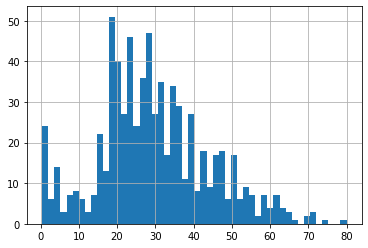

In [10]:
df['Age'].hist(bins=50)

In [11]:
## Arbitrary values
### 1.IT should be more frequently present

### Advantages
1.Easy to implement
2.Captures the importance of missingess if there is one
### Disadvantages
1.Distorts the original distribution of the variable
2.If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use

### How To Handle Categroical Missing Values

### Frequent Category Imputation¶

In [23]:
df=pd.read_csv("C:\\Users\\s\\OneDrive\\Desktop\\Data Science\\DATA SCIENCE\\MACHINE LEARNING\\EXPLORATORY DATA ANALYSIS\\Feature-Engineering-Live-sessions-master\\Feature-Engineering-Live-sessions-master\\train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [24]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [25]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [27]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [28]:
### Compute the frequency with every feature

<AxesSubplot:>

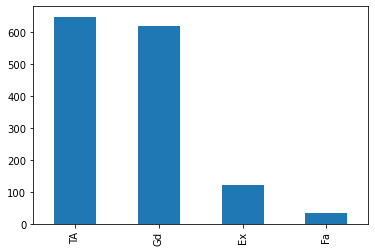

In [32]:
df['BsmtQual'].value_counts().plot.bar()

In [29]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

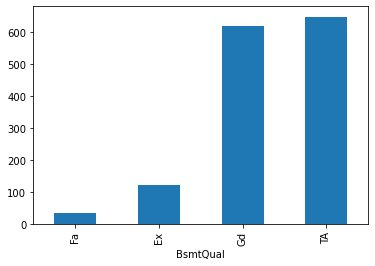

In [31]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True).plot.bar()

<AxesSubplot:>

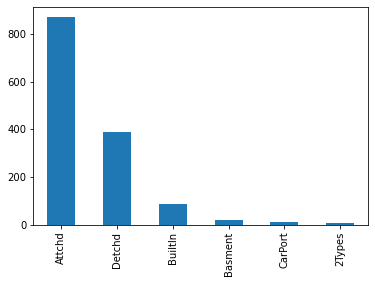

In [33]:
df['GarageType'].value_counts().plot.bar()

In [39]:
df['GarageType'].value_counts().index[0]

'Attchd'

<AxesSubplot:>

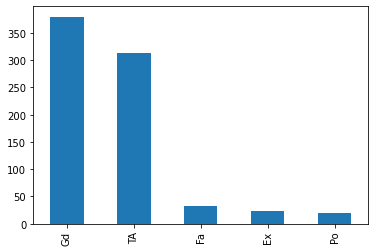

In [34]:
df['FireplaceQu'].value_counts().plot.bar()

In [35]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [43]:
df['GarageType'].mode()[0]

'Attchd'

In [40]:
## Replacing function
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [41]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    

In [42]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Advantages
1.Easy To implement
2.Fater way to implement
### Disadvantages
1.Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
It distorts the relation of the most frequent label

### suppose  if we have more frequent categories , we just replace NAN new category

In [45]:
df=pd.read_csv("C:\\Users\\s\\OneDrive\\Desktop\\Data Science\\DATA SCIENCE\\MACHINE LEARNING\\EXPLORATORY DATA ANALYSIS\\Feature-Engineering-Live-sessions-master\\Feature-Engineering-Live-sessions-master\\train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [46]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [49]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [50]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    

In [54]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
